In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
 6   species        150 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 8.3 KB


In [21]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Species']= label_encoder.fit_transform(df['Species'])
 
df['Species'].unique()

array([0, 1, 2])

In [25]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0


In [24]:
df.drop(columns='species',axis=1).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [26]:
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [28]:
df[df.species==1].head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
50,51,7.0,3.2,4.7,1.4,1,1
51,52,6.4,3.2,4.5,1.5,1,1
52,53,6.9,3.1,4.9,1.5,1,1
53,54,5.5,2.3,4.0,1.3,1,1
54,55,6.5,2.8,4.6,1.5,1,1


In [31]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

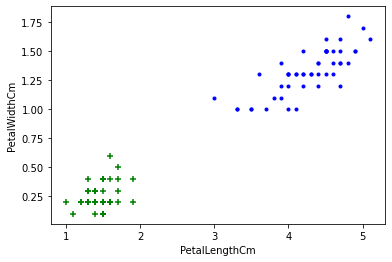

In [39]:
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'],color="green",marker='+')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'],color="blue",marker='.')
plt.show()

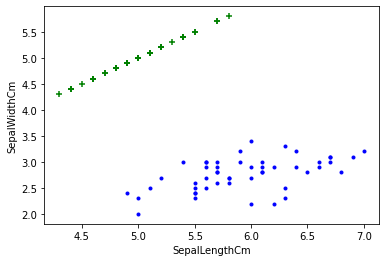

In [40]:
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(df0['SepalLengthCm'], df0['SepalLengthCm'],color="green",marker='+')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'],color="blue",marker='.')
plt.show()


In [41]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop(['Species'], axis='columns')
Y = df.Species

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [47]:
(X.shape,X_train.shape,X_test.shape)

((150, 6), (120, 6), (30, 6))

In [48]:
(Y.shape,Y_train.shape,Y_test.shape)

((150,), (120,), (30,))

In [49]:
from sklearn.svm import SVC
model = SVC()

In [51]:
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
model.score(X_test, Y_test)

0.9666666666666667

NO-1.....Regularization (C)

In [55]:
model_C = SVC(C=1)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

0.9666666666666667

In [56]:
model_C = SVC(C=10)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

1.0

2. Gamma

In [58]:
model_g = SVC(gamma=10)
model_g.fit(X_train, Y_train)
model_g.score(X_test, Y_test)

0.43333333333333335

3. Kernel

In [59]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
model_linear_kernal.score(X_test, Y_test)

1.0

In [61]:
model_rbf_kernal = SVC(kernel='rbf')
model_rbf_kernal.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
model_rbf_kernal.score(X_test, Y_test)

0.9666666666666667

In [68]:
model_poly_kernal = SVC(kernel='poly')
model_poly_kernal.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
model_poly_kernal.score(X_test, Y_test)

0.2

In [73]:
model_sigmoid_kernal = SVC(kernel='sigmoid')
model_sigmoid_kernal.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
model_sigmoid_kernal.score(X_test, Y_test)

0.2